In [74]:
# imports
from matplotlib import pyplot as plt
import numpy as np
import math as m
import random

# training rate (constant)
alpha = .01

In [3]:
# Utility Functions

# polynomial model
def general_model(theta, x):
    '''
        h(x) = w0 + w1*x
        h(x) = w0 + w1*x + w2*x**2
        ...
    '''
    ret = 0
    
    for i in range(len(theta)):
        ret += (theta[i] * (x**i))
    
    return ret

# gradient function (for linear model)

def gradient(theta, data):
    '''
        Inputs: theta = [w0, w1, ..., wn]
            data = [[x_data], [y_data]]
        Outputs: value of the gradient at theta = (w0, w1)
    '''
    
    x = data[0]
    y = data[1]
    
    grad = [0 for i in theta]
    
    
    n = len(data[0])
    
    for i in range(n):
        temp = general_model(theta, x[i]) - y[i]
        for j in range(len(grad)):
            grad[j] += (temp * (x[i]**j)) 
            
    for i in range(len(grad)):
        grad[i] = grad[i] / n
    
    return grad

def gradient_descent(theta, iterations, data):
    '''
        Inputs:
            theta = [w0, w1, ..., wn]
            iterations (# number of iterations)
        Outputs:
            updated theta = [w0, w1, ..., wn]
    '''
    
    
    for i in range(iterations):
        grad = gradient(theta, data)
        for j in range(len(theta)):
            theta[j] -= (alpha * grad[j])
    
    return theta

17683.809523805976
8554522.742857143
w0: 63.63961357607489
w1: -0.027355466700097354


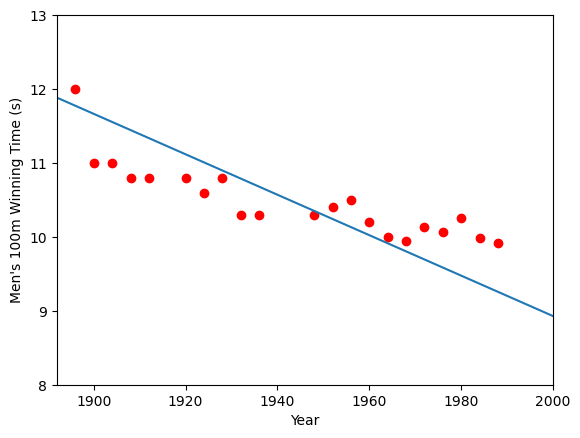

In [102]:
'''
    Problem 2: Table 1.2) Linear Regression analysis up to 1988. Derive parameters, project winning times
    for subsequent years.
'''

# x data
x = [1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988]

# y data
y = [12, 11, 11, 10.8, 10.8, 10.8, 10.6, 10.8, 10.3, 10.3, 10.3, 10.4, 10.5, 10.2, 10, 9.95, 10.14, 10.06, 10.25, 9.99, 9.92]

plt.scatter(x, y, c="red")
plt.xlabel("Year")
plt.ylabel("Men's 100m Winning Time (s)")


x_bar = np.mean(x)
y_bar = np.mean(y)

x_bar_squared = x_bar**2

x2_bar = sum([i*i for i in x])
y2_bar = sum([i*i for i in y])
xy_bar = sum([i*j for i in x for j in y])


ss_xx = sum([i*i for i in x]) - (sum(x)**2)/(len(x))

ss_xy = sum([i*j for i in x for j in y]) - (sum(x)*sum(y)/len(x))

w1 = -ss_xy/(ss_xx*ss_xx)
w0 = y_bar - x_bar*w1

print(ss_xx)
print(ss_xy)
print(f"w0: {w0}")
print(f"w1: {w1}")

z = np.linspace(1882, 2000, 1000)
h = (w0 + z*(w1))
plt.plot(z, h)

plt.xlim(1892, 2000)
plt.ylim(8, 13)



plt.show() # present the data

In [5]:

x_bar = np.mean(x)
y_bar = np.mean(y)

x2_bar = np.mean([i*i for i in x])
xy_bar = np.mean([i*j for i in x for j in y])
print(f"x:{x_bar}")
print(f"y:{y_bar}")
print(f"xx:{x2_bar}")
print(f"xy:{xy_bar}")

w1 = (xy_bar  - (x_bar*y_bar)) / (x2_bar - (x_bar**2)) 
w0 = y_bar - (w1 * x_bar)

print(f"w0: {w0}")
print(f"w1: {w1}")

x:1943.2380952380952
y:10.542380952380952
xx:3777016.380952381
xy:20486.35628117914
w0: 10.542380952372557
w1: 4.3201977970889824e-15


[0.20042307822462446, -1.1999999999999975]


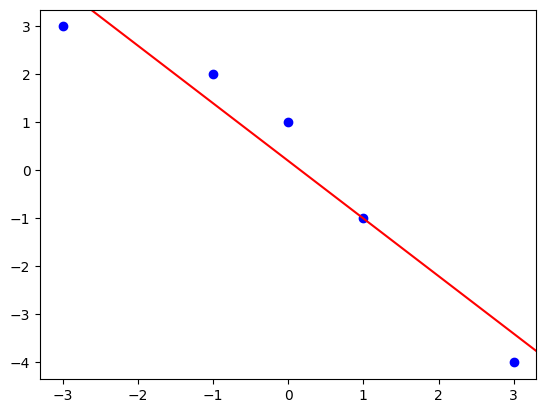

In [22]:
'''
    Problem 3: Using the data, determine the optimal fits for linear, quadratic, and cubic polynomials.
    Graphically represent these polynomials alongside original data
'''

# x data
x = [-3, -1, 0, 1, 3]

# y data
y = [3, 2, 1, -1, -4]



data = [x, y]
iterations = 1000
theta = [10, 10] # initial guess for parameters

g = gradient_descent(theta, iterations, data)
print(g)
w0 = g[0]
w1 = g[1]

plt.axline((0, w0), slope=w1, color="red", label='Linear Regression Line')


plt.scatter(x, y, c="blue")

plt.show() # present data

[0.8213272770398652, -1.1999999999999975, -0.149037424277237]


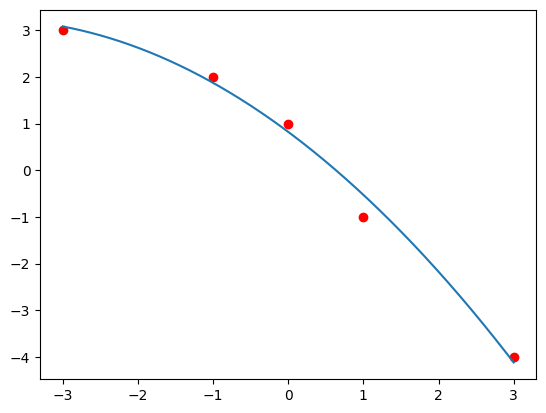

In [23]:
# quadratic polynomial

# x data
x = [-3, -1, 0, 1, 3]

# y data
y = [3, 2, 1, -1, -4]

data = [x, y]
iterations = 1000
theta = [10, 10, 10] # initial guess for parameters

g = gradient_descent(theta, iterations, data)
print(g)
w0 = g[0]
w1 = g[1]
w2 = g[2]

z = np.linspace(-3, 3, 1000)

v = w0 + w1*z + w2*(z**2)
plt.scatter(x, y, c="red")
plt.plot(z, v)


[4041, 63402, 79342, -6820]
[-1.1077786881284266e+273, 1.2624631878321245e+293, 1.80736893399407e+218, 1.1227005088416652e+294]


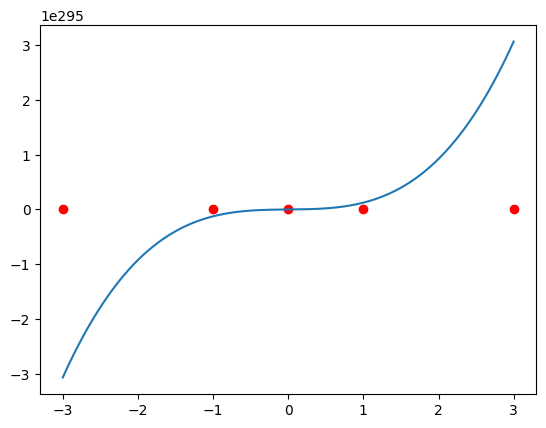

In [33]:
# cubic polynomial

# x data
x = [-3, -1, 0, 1, 3]

# y data
y = [3, 2, 1, -1, -4]

data = [x, y]
iterations = 1000
theta = [random.randint(-100000, 100000), random.randint(-100000, 100000), random.randint(-100000, 100000), random.randint(-100000, 100000)] # initial guess for parameters
# i cannot get the gradient descent algorithm to converge
print(theta)
g = gradient_descent(theta, iterations, data)
print(g)
w0 = g[0]
w1 = g[1]
w2 = g[2]
w3 = g[3]

z = np.linspace(-3, 3, 1000)

v = w0 + w1*z + w2*(z**2) + w3*(z**3)
plt.scatter(x, y, c="red")
plt.plot(z, v)


21
[2.4849066497880004, 2.3978952727983707, 2.3978952727983707, 2.379546134130174, 2.379546134130174, 2.379546134130174, 2.3608540011180215, 2.379546134130174, 2.33214389523559, 2.33214389523559, 2.33214389523559, 2.341805806147327, 2.3513752571634776, 2.322387720290225, 2.302585092994046, 2.2975725511705014, 2.316487998163037, 2.3085671646715933, 2.327277705584417, 2.301584592660462, 2.2945529212967815]
w0*: 3.037217467771058e+43
w1: -0.006129578761980758
3.108733205578609
-0.006129578761980758


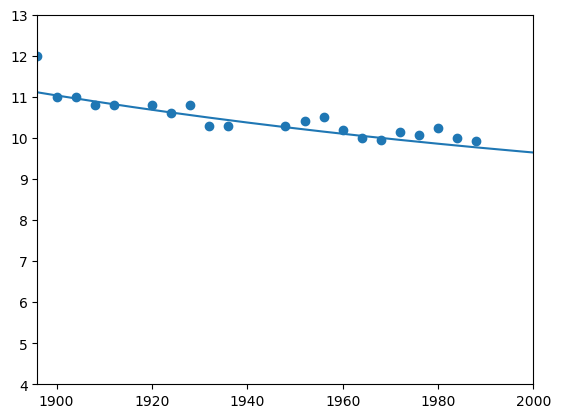

In [130]:
'''
    Problem 4: Fit the data in Table 1.2 to an exponential function h(x) = w0*e**(w1x) by converting
    problem to a linear regression problem.
'''

# x data
x = [1896, 1900, 1904, 1908, 1912, 1920, 1924, 1928, 1932, 1936, 1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988]

# y data
y = [12, 11, 11, 10.8, 10.8, 10.8, 10.6, 10.8, 10.3, 10.3, 10.3, 10.4, 10.5, 10.2, 10, 9.95, 10.14, 10.06, 10.25, 9.99, 9.92]
print(len(y))
y_transform = [np.log(i) for i in y]
# [2.4849066497880004, 2.3978952727983707, 2.3978952727983707, 2.379546134130174, 2.379546134130174, 2.379546134130174, 2.3608540011180215, 2.379546134130174, 2.33214389523559, 2.33214389523559, 2.33214389523559, 2.341805806147327, 2.3513752571634776, 2.322387720290225, 2.302585092994046, 2.2975725511705014, 2.316487998163037, 2.3085671646715933, 2.327277705584417, 2.301584592660462, 2.2945529212967815]
print(y_transform)

theta = [-10, 10]
iterations = 10
data = [x, y_transform]

def graph(func, x_range):
   u = np.arange(*x_range)
   y = func(u)
   plt.plot(u, y)


# w0_star, w1 = gradient_descent(theta, iterations, data)
print(f"w0*: {w0_star}")
print(f"w1: {w1}")


plt.scatter(x, y)


ss_xx = sum([i*i for i in x]) - (sum(x)**2)/(len(x))

ss_xy = sum([i*j for i in x for j in y_transform]) - (sum(x)*sum(y_transform)/len(x))

w1 = -ss_xy/(ss_xx*ss_xx)
w0 = y_bar - x_bar*w1

w0 = np.log(w0)

print(w0)
print(w1)

z = np.linspace(0, 2000, 1000)
h = (w0)*(np.e**(w1*(z-1896))) + 8


plt.xlim(1896, 2000)
plt.ylim(4, 13)

plt.plot(z, h)

plt.show()
